# Rhizotron lab experiment

In [1]:
# We first need to load the pyCATHY package
# pyCATHY is calling fortran codes via python subroutines and ease the process
#!pip install -i https://test.pypi.org/simple/ pycathy-v001==0.0.1
!pip install git+https://github.com/BenjMy/pycathy_wrapper.git
#!git clone https://github.com/BenjMy/pycathy_wrapper.git

  Cloning https://github.com/BenjMy/pycathy_wrapper.git to /tmp/pip-req-build-4rkp75hc
  Running command git clone -q https://github.com/BenjMy/pycathy_wrapper.git /tmp/pip-req-build-4rkp75hc
  Resolved https://github.com/BenjMy/pycathy_wrapper.git to commit bf26543e2781b210e368d4d0aae535f79874e800
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [3]:
import ipywidgets as widgets

widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [1]:
import os
import numpy as np
from pyCATHY import cathy_tools 
from pyCATHY import plot_tools as cplt 
from pyCATHY import rhizo_tools

#import cathy_tools as CATHY
os.getcwd()

'/home/ben/Documents/CATHY/pyCATHY'

We initiate a CATHY object; if the the CATHY src files are not included within the 'path2prj', they are automatically fetched from the gitbucket (If the notebook is initiate locally with an internet connection)

In [3]:
path2prj ='notebooks'
prj = 'rhizo_prj2'
#os.chdir(path2prj)
simu = cathy_tools.CATHY(dirName=path2prj,prjName=prj,notebook=True)
simu # show the CATHY object

init CATHY object


In [4]:
simu.workdir

'/home/ben/Documents/CATHY/pyCATHY/notebooks'

## Rhizotron DEM

### Build the grid 3d with arbitrary values

### Run preprocessor

## Simulation inputs

### 1- Initial conditions

### 2- Irrigation schedule

### 3- Boundary conditions

### 4- Soil and roots inputs

### run processor 

## Explore outputs

In [ ]:
step = 1

In [ ]:
cplt.showvtk(unit='pressure',timeStep=1,notebook=True, path='./' + prj + '/vtk/')
cplt.showvtk(unit='pressure',timeStep=2,notebook=True, path='./' + prj + '/vtk/')
cplt.showvtk(unit='pressure',timeStep=3,notebook=True, path='./' + prj + '/vtk/')
cplt.showvtk(unit='pressure',timeStep=4,notebook=True, path='./' + prj + '/vtk/')

cplt.showvtk(unit='saturation',timeStep=1,notebook=True, path='./' + prj + '/vtk/')
cplt.showvtk(unit='saturation',timeStep=2,notebook=True, path='./' + prj + '/vtk/')
cplt.showvtk(unit='saturation',timeStep=3,notebook=True, path='./' + prj + '/vtk/')
cplt.showvtk(unit='saturation',timeStep=4,notebook=True, path='./' + prj + '/vtk/')


In [5]:
import glob
import subprocess

We run the preprocessor with the default files inputs (weill et al example). 
This step create all the prepro files required for the processor later on.

In [7]:
simu.run_preprocessor(verbose=True)

0
1
run preprocessor

 wbb...

 searching the dtm_13.val input file...
 assigned nodata value =  -9999.0000000000000     

 number of processed cells =         400

 ...wbb completed

 rn...
 csort I...
 ...completed

 depit...
 dem modifications =            0
 dem modifications =            0 (total)
 ...completed

 csort II...
 ...completed

 cca...

 contour curvature threshold value =    9.99999996E+11
 ...completed

 smean...
 mean (min,max) facet slope =  0.052056253 ( 0.020000000, 0.053851648)
 ...completed

 dsf...
 the drainage direction of the outlet cell (           8 ) is used
 ...completed

 hg...
 ...completed

 saving the data in the basin_b/basin_i files...

 ...rn completed

 mrbb...


 Select the header type:
 0) None
 1) ESRI ascii file
 2) GRASS ascii file
 (Ctrl C to exit)

 -> 
 Select the nodata value:
 (Ctrl C to exit)

 -> 
 Select the pointer system:
 1) HAP system
 2) Arc/Gis system
 (Ctrl C to exit)

 ->  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dem fil

In [8]:
# survey.hap_in # hap.in parameters are saved in a dict
# survey.hap_in['Ncells'] # access and check the number of cell from the CATHY object

We run the processor with the default files inputs (weill et al example)

In [9]:
simu.run_processor(verbose=True)

recompile


chknew.f:23:72:

   23 |       IF (N-2) 11,1,1
      |                                                                        1
chknew.f:27:72:

   27 |     1 IF(TOPOL(N+1)-1-NTERM) 12,2,12
      |                                                                        1
chknew.f:37:72:

   37 |          IF(IE-IS) 3,7,5
      |                                                                        1
chknew.f:38:72:

   38 |     3    IF(IE-IS+1) 13,4,24
      |                                                                        1
chknew.f:47:72:

   47 |             IF(JA(K+1)-JA(K)) 14,14,6
      |                                                                        1
chknew.f:52:72:

   52 |          IF(JA(K)-I)66,39,66
      |                                                                        1
chknew.f:59:72:

   59 |    39    IF(JS-1) 15,9,9
      |                                                                        1
chknew.f:63:72:

   63 |     9    IF(JE-N)10,10,16
  

move cathy into rhizo_prj2 directory
run processor
/home/ben/Documents/CATHY/pyCATHY/notebooks/rhizo_prj2

     nsf  (# of seepage faces)               =      0


      TIME STEP:        1    DELTAT:   1.0000E-02    TIME:   1.0000E-02
     ******************************************************************


                     NONLINEAR CONVERGENCE BEHAVIOR 
 iter- convergence error norms  node    PNEW at    POLD at  residual error norms
 ation         PL2      PIKMAX IKMAX      IKMAX      IKMAX        FL2       FINF
     1  2.5355E-01  1.8241E-02  7056   3.02E+00   3.00E+00  2.647E-05  2.764E-06
     2  1.7396E-01 -1.6955E-02     1  -1.70E-02   0.00E+00  5.740E-06  1.475E-06
     3  7.8632E-02  1.4427E-02     1  -2.53E-03  -1.70E-02  8.594E-03  2.311E-03
     4  2.2540E-02  5.0732E-03   483   5.30E-03   2.26E-04  1.285E-03  3.860E-04
     5  1.4133E-02  5.4077E-03   481   5.55E-03   1.46E-04  2.591E-04  8.335E-05
     6  7.6220E-02  5.5137E-03   464   5.54E-03   2.31E-05  1.599E-04  

Plot results

plot pressure


/home/ben/.local/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


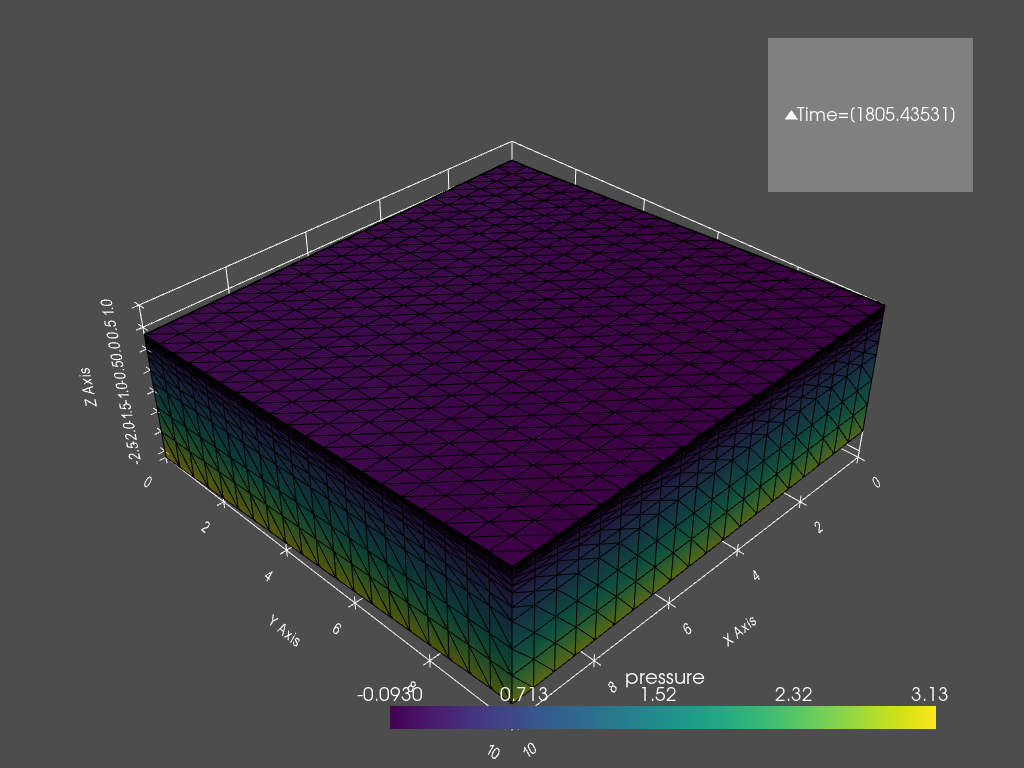

In [10]:
cplt.showvtk(unit='pressure',timeStep=1,notebook=True, path='./' + prj + '/vtk/')
